# EECS189 Project T Final Notebook
## Week 2: Testing/Training, Cross-Validation, and Bias-Variance
## This is the solution notebook, so all code will be written out. In the student notebook, specific lines will be left blank for students to fill in
    


In [13]:
# import necessary libraries

from helper_fns import *

# data organization libraries
import numpy as np
import pandas as pd

# data visualization libraries
import plotly.express as px
import matplotlib.pyplot as plt

# modeling libraries
import sklearn as sk


# Goals

    Prediction models that are used in the industry must be able to maintain accuracy on previously unseen data. At this point in your EECS education, you have only learned model assesment within the context of data the model has already seen. This creates a problem, because if we assess our model with the same data that was used to fit it, then we may overestimate how well our model does at prediction. After completing this assigment, students will know the methodology behind improving prediction models so they are ready for use in the real world.

# Context

    Suppose that you have been contracted by the Portuguese Government to conduct data driven research on forest fire prevention. The main goal of your research is to create a model that will be used by a government fast forrest fire detection system.
    
    The data set we are given consists of 517 seperate forrest fire instances from different areas within the Montesinho Natural Park in Portugal, with features being the weather and climate conditions recorded the day of the fire.
    
    

# Forest Fires Data

![](park.png)


    Here is a map of the park that our data set comes from. Lets download our dataset and  take a look at the first couple of rows.

In [14]:
fire_df = pd.read_csv('forestfires.csv')
fire_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


    The first two columns represent the location of the fire on the simplied map provided above. The next two columns are for the date.
    
    The response variable, meaning the value we are trying to predict, can be found in the area column, which represents the total area burned per Hectares(ha). The rest of the columns are the weather and climate features we will be using to fit our model. Wind is wind speed in km/h and Rain is outside rain in mm/m^2. The other columns represent Codes from the Canadian Fire Weather Index. Below is a diagram outline what each Code means.

![](fwi.png)
    

    Here we will use the Seaborn visualization library to create univariate histograms for each data point.

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>, <AxesSubplot:>]],
      dtype=object)

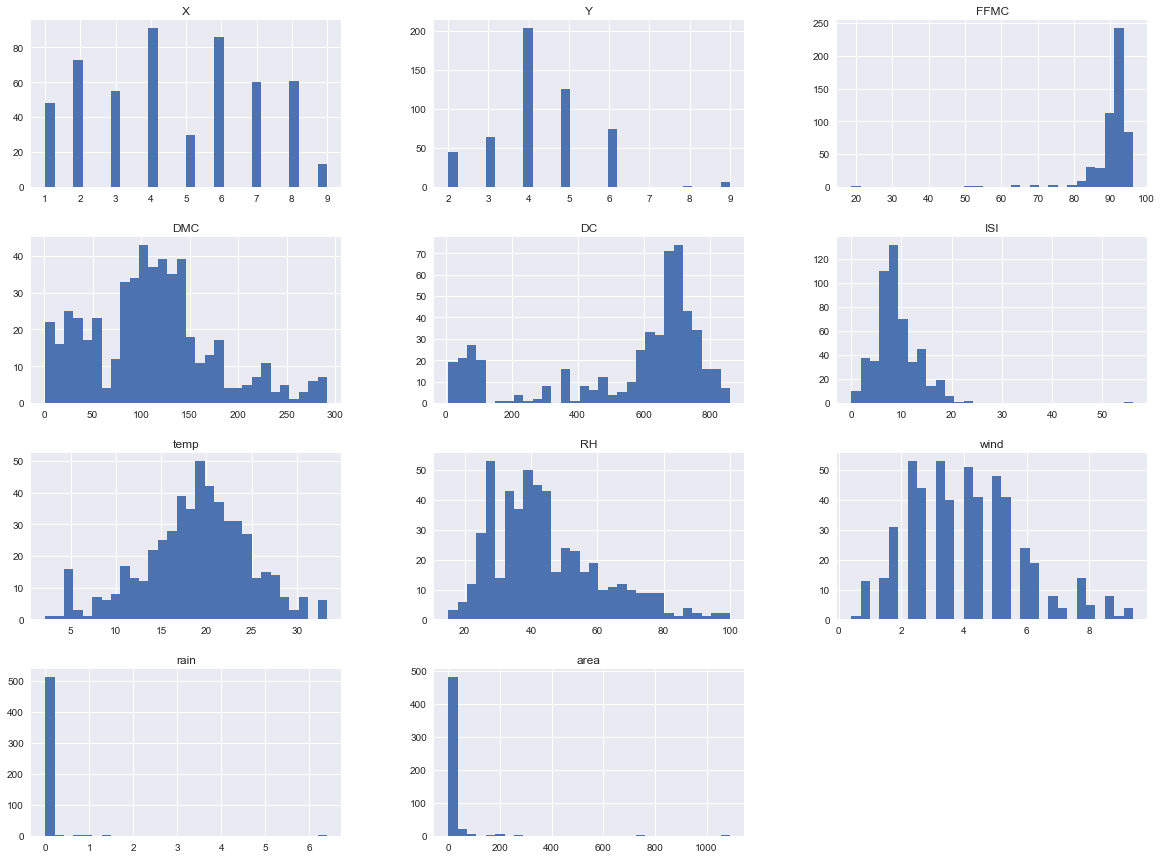

In [15]:
plt.style.use('seaborn')

fire_df.hist(bins=30, figsize=(20,15))

# Linear Models

    In this section we will begin to build the linear models we will be evaluating later. We will be using different variants of the OLS and SVM models you have been exposed to previously. Here is a diagram to refresh your knowledge of OLS. For move review material see this note from EE16A linked below.
[OLS_REVIEW_16A](https://eecs16a.org/lecture/Note23.pdf)

    
![](OLS.png)




In [16]:
#this is from data 100 FA2020 lecuture 13
# https://docs.google.com/presentation/d/15olJS1Yuk22spzrNx4It6-eLm8gkZM4pFKKOWhKXBUI/edit#slide=id.g821989616c_1_69
#we should create our own version of these same main points, I'm gonna skip this 
# for now and start using scikit learn methods


# Naive Linear Model

    Now that you have a better understanding of the data and models we will be working with,  we will get some practice with the Scikit-Learn functions that will be used throughout this assigment. We will start with the LinearRegression class from Scikit-Learn's linear_model library. The documentation is linked below.
[LinearRegression_Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

# Visualizing the Training Data

The first thing to do is always to find out what you're working with. We load the data X and labels y.

In [10]:
# TODO load X and y
X = np.array([[1, 2], [3, 4]]*10)
y = np.array([2, 3]*10)

# shuffle x and y?

# Features present in the data in order. These column names will help you interpret trends you see in the data
# This was originally nested alongside the numerical data, but OLS requires us to use a matrix instead of a dictionary
# TODO populate this with the actual column names
FEATURES = ['product name', 'price']

## TODO something like "plot some of the features of startups with respect to their success rates. What do you notice about the correlations? Are there correlations?"

In [6]:
def create_feat_selector(features):
    """
    Helper function to create a subset of the data that will only include certain features
    A full list of features is defined in FEATURES
    """
    for f in features:
        assert f in FEATURES, "'{}' is not defined in the varaible FEATURES!".format(f)
    def feat_selector(X):
        indices = [FEATURES.index(f) for f in features]
        return X[:, indices]
    return feat_selector

# Structuring Your Machine Learning Model

In this project, we will focus on the general process behind training many machine learning models. To illustrate this, let's pull out the SVM models you have learned about this week!

In particular, we will be using it as a classifier, so it will be called a Support Vector Classifier (SVC). Use [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to implement the training step below, given hyperparameters C and gamma. You may find the examples in the documentation very useful.

In [7]:
def train(X_train, y_train, C=1.0, gamma=0.2):
    """
    X_train - Training data
    y_train - Training labels
    C - a hyperparameter for SVC
    gamma - a hyperparameter for SVC
    
    Return reg, an instance of LinearRegression.fit() that represents the trained model
    """
    ##### START #####
    reg = SVC(C=C, gamma=gamma).fit(X_train, y_train)
    ##### END #####
    return reg

## TODO something about changing up the features passed in X_train based on the visualizations above

# K-Fold Cross Validation

How good are your hyperparameters? How do we measure that? One thought is to estimate accuracy on the test set. But wait! The test set should only be run AFTER we're done training everything or else our final results will be fudged. Here's an idea: let's use our knowledge of k-fold cross validation to split up our training set into a "training set" and a "validation set", and measure accuracy on the validation set. Average the accuracy over all k folds. What is the accuracy of your model?

Perhaps [sklearn.model_selection.KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) would be useful.

TODO say WOW the featurizations that have low training error and high test error are exactly the ones that have low variance, that was calculated in the previous part! O:

# Measuring the Bias and Variance of Your Model

Is the model doing well?

As noted in lecture, bias is generally expressed as a model's tendency to approximate certain functions even if conflicting features are in the training set, and variance is generally expressed as a model's difference in performance on the test set given a different training set. Also remember the irreducible error is that which cannot be eliminated because it is in our inherently noisy measurements of the labels.

A mathematical formulation is below:

$$\text{Total Noise} = (E[h(x|D)] - f(x))^2 + Var(h(x|D)) + Var(Z)$$

where h(x|D) is the model's prediction given a training dataset, f(x) is the true label, and Z is the inherent noise in the labels. These terms are bias, variance, and irreducible error, respectively. A detailed derivation can be found [here](https://www.eecs189.org/static/notes/n5.pdf) or in the notes.

## The Game Plan

1. Since these values are evaluated over many different training datasets, let's structure this like k-fold cross validation so we can randomly sample datasets. Perhaps, you can use [sklearn.model_selection.KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). **NOTE:** X_test must be the same for all datasets for the bias variance measurement corresponding to the above to be correct.

2. For each of the k splits, 
 - train your model using your selected features
 - record predictions for each test datapoint x

3. After gathering the above information, average the predicted label over the k splits for each input x to obtain E[h(x|D)] and combine with the appropriate y label f(x). Average these values over inputs x to get the bias

4. Compute the variance of predictions for each input x. Then average over inputs x to get the variance Var(h(x|D))

What is the bias of your model? The variance? 

In [13]:
# TODO this  function is COMPLETELY untested

def get_bias_variance(X, y, feat_selector):
    """
    X- the original training data
    y- the labels for the original training data
    feat_selector- a function created by create_function_selector()
    """
    
    predictions = []
    true_labels = []

    ##### START STEP 1 #####
    n_rest = int(X.shape[0] * 0.75)
    X_rest, X_test = X[:n_rest], X[n_rest:]
    y_rest, y_test = y[:n_rest], y[n_rest:]
    
    kf = sklearn.model_selection.KFold(n_splits=4)
    for train_index, test_index in kf.split(X_rest):
        X_train, y_train = X[train_index], y[train_index]
    ##### END STEP 1 #####
        ##### START STEP 2 #####
        reg = train(X_train, y_train)
        predictions.append(reg.predict(X_test))
        true_labels.append(y_test)
        ##### END STEP 2 #####
    
    ##### START STEP 3 #####
    bias = np.mean((np.mean(predictions, axis=0) - true_labels[0])**2)
    ##### END STEP 3 #####
    
    ##### START STEP 4 #####
    variance = np.std(np.mean(predictions, axis=0))
    ##### END STEP 4 #####
    
    return bias, variance

In [15]:
get_bias_variance(X, y, create_feat_selector(['product name']))

(0.0, 0.4898979485566356)

## TODO something about repeating the above until your model prediction accuracy is ~90% (base this percentage on the best staff solution)